In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [5]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((522, 12, 1), (522,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Kara_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.6865 - root_mean_squared_error: 0.8286

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 8s 99ms/step - loss: 0.6881 - root_mean_squared_error: 0.8295 - val_loss: 0.4902 - val_root_mean_squared_error: 0.7001
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.5937 - root_mean_squared_error: 0.7705

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.5968 - root_mean_squared_error: 0.7726 - val_loss: 0.4394 - val_root_mean_squared_error: 0.6629
Epoch 3/50
43/53 [=======================>......] - ETA: 0s - loss: 0.5344 - root_mean_squared_error: 0.7310

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.5279 - root_mean_squared_error: 0.7266 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6248
Epoch 4/50
52/53 [============================>.] - ETA: 0s - loss: 0.4609 - root_mean_squared_error: 0.6789

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.4606 - root_mean_squared_error: 0.6787 - val_loss: 0.3452 - val_root_mean_squared_error: 0.5876
Epoch 5/50
41/53 [======================>.......] - ETA: 0s - loss: 0.4241 - root_mean_squared_error: 0.6512

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.4047 - root_mean_squared_error: 0.6362 - val_loss: 0.3018 - val_root_mean_squared_error: 0.5493
Epoch 6/50
47/53 [=========================>....] - ETA: 0s - loss: 0.3489 - root_mean_squared_error: 0.5906

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.3464 - root_mean_squared_error: 0.5885 - val_loss: 0.2623 - val_root_mean_squared_error: 0.5121
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2914 - root_mean_squared_error: 0.5398

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.2939 - root_mean_squared_error: 0.5421 - val_loss: 0.2410 - val_root_mean_squared_error: 0.4909
Epoch 8/50
43/53 [=======================>......] - ETA: 0s - loss: 0.2564 - root_mean_squared_error: 0.5063

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.2524 - root_mean_squared_error: 0.5024 - val_loss: 0.2110 - val_root_mean_squared_error: 0.4593
Epoch 9/50
52/53 [============================>.] - ETA: 0s - loss: 0.2098 - root_mean_squared_error: 0.4580

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.2098 - root_mean_squared_error: 0.4581 - val_loss: 0.1660 - val_root_mean_squared_error: 0.4074
Epoch 10/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1777 - root_mean_squared_error: 0.4215

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.1763 - root_mean_squared_error: 0.4199 - val_loss: 0.1545 - val_root_mean_squared_error: 0.3930
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.1401 - root_mean_squared_error: 0.3743

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1401 - root_mean_squared_error: 0.3743 - val_loss: 0.1162 - val_root_mean_squared_error: 0.3408
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.1197 - root_mean_squared_error: 0.3460

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.1197 - root_mean_squared_error: 0.3460 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3245
Epoch 13/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0991 - root_mean_squared_error: 0.3148 - val_loss: 0.1351 - val_root_mean_squared_error: 0.3675
Epoch 14/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0788 - root_mean_squared_error: 0.2806

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0799 - root_mean_squared_error: 0.2827 - val_loss: 0.1015 - val_root_mean_squared_error: 0.3185
Epoch 15/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0696 - root_mean_squared_error: 0.2638

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2351
Epoch 16/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0590 - root_mean_squared_error: 0.2430

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0582 - root_mean_squared_error: 0.2413 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1944
Epoch 17/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0479 - root_mean_squared_error: 0.2188

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0471 - root_mean_squared_error: 0.2170 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1654
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1894
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0389 - root_mean_squared_error: 0.1973 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1748
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0357 - root_mean_squared_error: 0.1891 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1911
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0403 - root_mean_squared_error: 0.2007 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 22/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1848

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0369 - root_mean_squared_error: 0.1920 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0347 - root_mean_squared_error: 0.1862 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2060
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0316 - root_mean_squared_error: 0.1778 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0344 - root_mean_squared_error: 0.1854 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0334 - root_mean_squared_error: 0.1827 - val_loss: 0.0348 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0295 - root_mean_squared_error: 0.1717 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1442
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0318 - root_mean_squared_error: 0.1784 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1678
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0276 - root_mean_squared_error: 0.1662 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1670
Epoch 32/50
40/53 [=====================>........] - ETA: 0s - loss: 0.0296 - root_mean_squared_error: 0.1720

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0311 - root_mean_squared_error: 0.1763 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1412
Epoch 33/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0325 - root_mean_squared_error: 0.1802 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 34/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1789

INFO:tensorflow:Assets written to: Kara_model_LT5\assets


INFO:tensorflow:Assets written to: Kara_model_LT5\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0321 - root_mean_squared_error: 0.1790 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 35/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0314 - root_mean_squared_error: 0.1773 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0295 - root_mean_squared_error: 0.1719 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 37/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0297 - root_mean_squared_error: 0.1724 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1771
Epoch 38/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0275 - root_mean_squared_error: 0.1659 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2775
Epoch 39/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0306 - root_mean_squared_error: 0.1750 - val_loss: 0.0476 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.4897396961847942 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

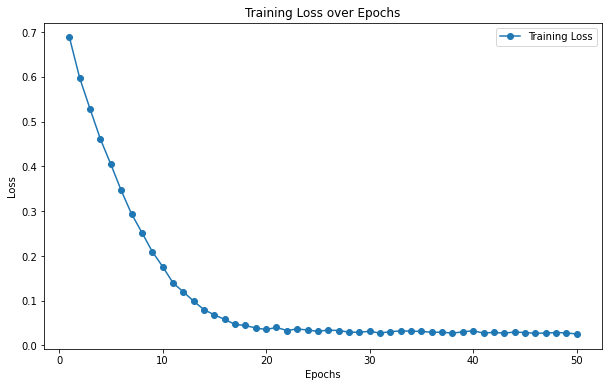

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

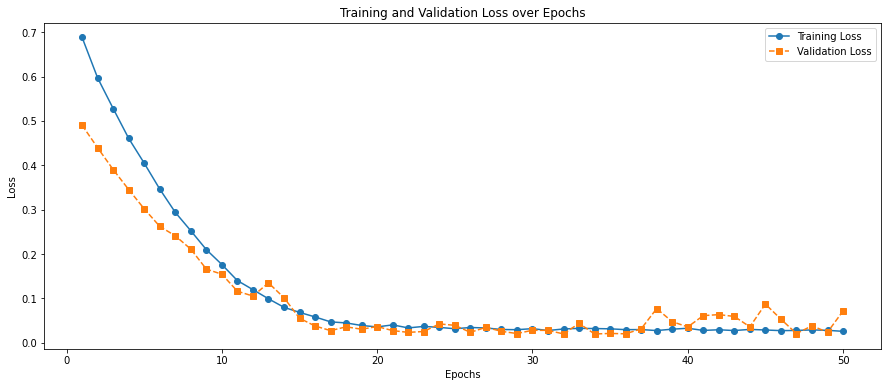

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.1466151006186366
MAE : 0.11581231677985236


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,144334.359375,60592.380
1,291282.156250,131973.043
2,518195.968750,753595.099
3,701461.437500,909176.475
4,832952.875000,917006.278
5,845404.312500,906368.363
6,856007.437500,917403.622
7,950483.937500,910653.838
8,835965.437500,822319.125
9,785232.437500,557314.102


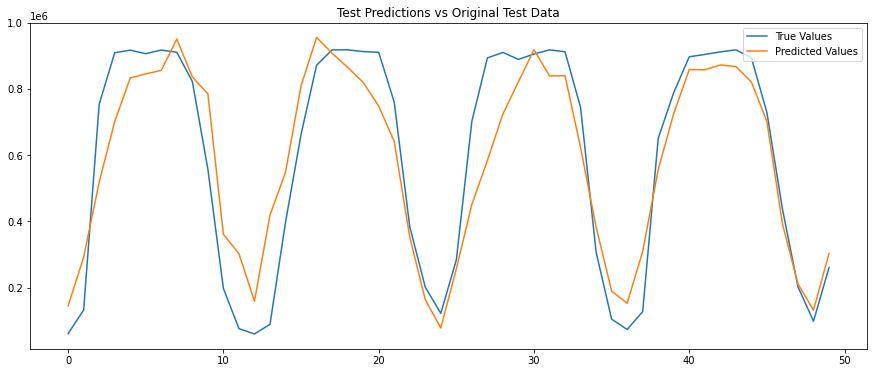

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

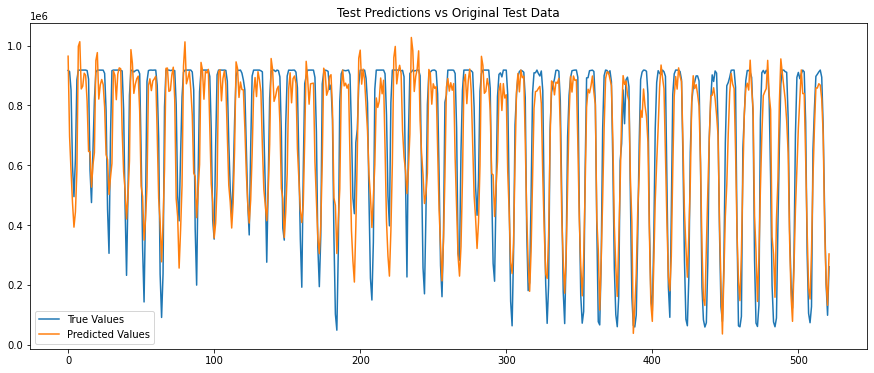

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()